Make a comparison of any two books from the Project Gutenberg portal on the basis of bigrams: plot the 20 most popular bigrams in each of the two books as well as the word networks (choose the cutoff level yourself). Check how the resulting figure looks in the absence of function word removal.

In [ ]:
# Books:
# 11 - Alice's Adventures in Wonderland by Lewis Carroll
# 16 - Peter Pan by J. M. Barrie

In [37]:
# importing libraries
import tmtoolkit as tm
from tmtoolkit.corpus import Corpus
import spacy
import statsmodels.formula.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
from urllib import request


In [23]:
def process_book(name):
    url = "https://www.gutenberg.org/cache/epub/" + name + "/pg" + name + ".txt"
    
    response = request.urlopen(url)
    raw_text = response.read().decode('utf8')
    raw_text=raw_text.split('***')
    raw_text = raw_text[2]  

    file = open('Lab_3_docs/' + name + ".txt", "w", encoding="utf-8")
    file.write(raw_text)
    file.close()



books = [16,11]


for x in books:
    process_book(str(x))

In [24]:
spacy.load('en_core_web_sm')

def prepare_corp(rm_stopwords: bool):
    corp = tm.corpus.Corpus.from_folder("Lab_3_docs", language="en", load_features=[])
    tm.corpus.filter_clean_tokens(corp, remove_stopwords=rm_stopwords)
    tm.corpus.remove_punctuation(corp)
    tm.corpus.to_lowercase(corp)
    tm.corpus.remove_tokens(corp, "")
    tokens = tm.corpus.tokens_table(corp)

    corp_bigrams = tm.corpus.corpus_ngramify(corp, n = 2, inplace=False)
    bigrams = tm.corpus.tokens_table(corp_bigrams)
    return tokens, bigrams

tokens, bigrams = prepare_corp(rm_stopwords = True)
tokens_sw, bigrams_sw = prepare_corp(rm_stopwords = False)
tokens

,doc,position,token,is_punct,is_stop,like_num
0,11,0,illustration,False,False,False
1,11,1,alice,False,False,False
2,11,2,adventures,False,False,False
3,11,3,wonderland,False,False,False
4,11,4,lewis,False,False,False
...,...,...,...,...,...,...
29146,16,18730,children,False,False,False
29147,16,18731,gay,False,False,False
29148,16,18732,innocent,False,False,False
29149,16,18733,heartless,False,False,False


<Axes: xlabel='count', ylabel='token'>

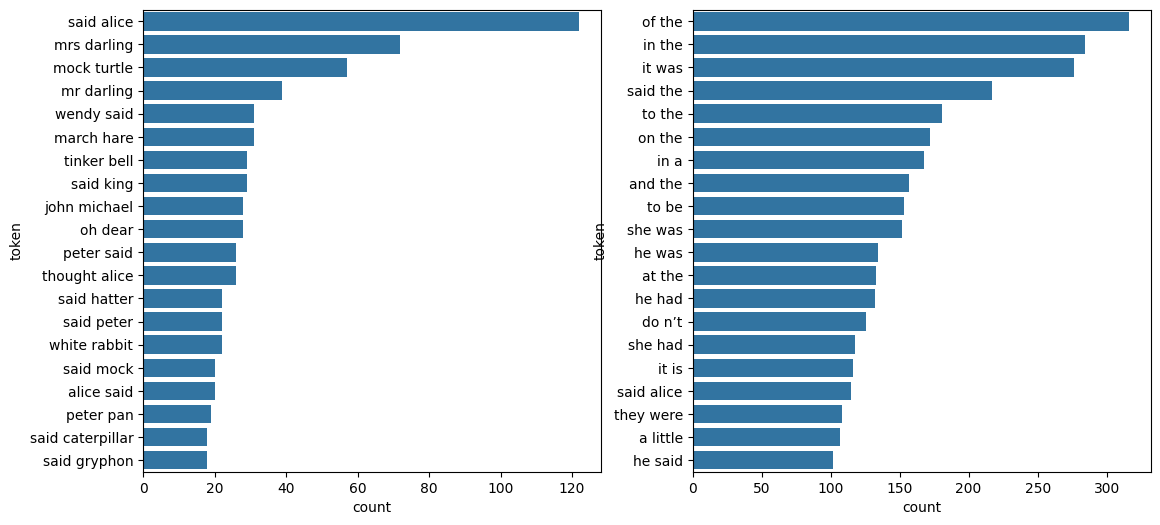

In [25]:
top_bigrams = bigrams["token"].value_counts().reset_index().head(20)
top_bigrams_sw = bigrams_sw["token"].value_counts().reset_index().head(20)

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(top_bigrams, y="token", x="count", orient = 'h')

plt.subplot(1,2,2)
sns.barplot(top_bigrams_sw, y="token", x="count", orient = 'h')

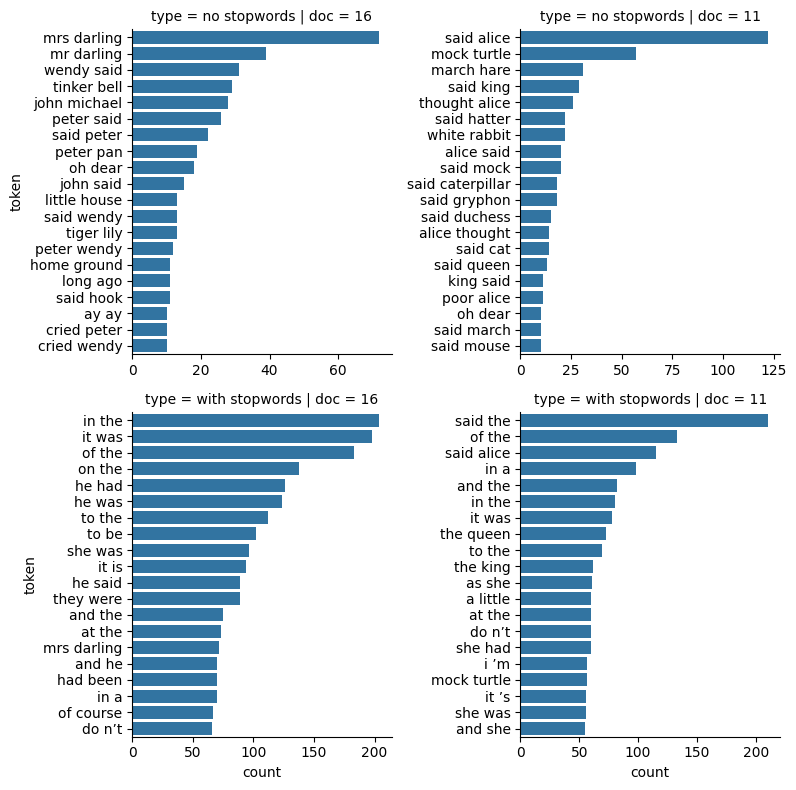

In [34]:
top_doc_bigrams = bigrams.groupby(["doc", "token"]).size().reset_index(name='count').sort_values(["doc", "count"], ascending=False).groupby("doc").head(20)

top_doc_bigrams_sw = bigrams_sw.groupby(["doc", "token"]).size().reset_index(name='count').sort_values(["doc", "count"], ascending=False).groupby("doc").head(20)

top_doc_bigrams["type"] = "no stopwords"
top_doc_bigrams_sw["type"] = "with stopwords"
top_doc_bigrams = pd.concat([top_doc_bigrams, top_doc_bigrams_sw], ignore_index=True)

g = sns.FacetGrid(top_doc_bigrams, row="type", col="doc", height=4, aspect=1, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, y="token", x="count", orient="h")
plt.show()

In [ ]:
df_alice = bigrams[bigrams['doc']==11]["token"].str.split(expand = True).add_prefix("token")
df_alice = df_alice[["token0", "token1"]].value_counts().reset_index()
df_alice[df_alice.token0 == "said"].head(20)